In [1]:
from sparc import load_model
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt

/home/cheoljun/anaconda3/envs/asp/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
coder = load_model("en", device= "cpu")

/home/cheoljun/public_src/ASP/sparc/sparc.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(ckpt)
/home/cheoljun/anaconda3/envs/asp/lib/python3.8/site-p

# Resynthesis

In [3]:
wav_file  = '../sample_audio/sample1.wav'

In [4]:
# EMA channel_label = ['TDX','TDY','TBX','TBY','TTX','TTY','LIX','LIY','ULX','ULY','LLX','LLY']
code = coder.encode(wav_file)

/home/cheoljun/anaconda3/envs/asp/lib/python3.8/site-packages/torch/nn/functional.py:5193: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
/home/cheoljun/anaconda3/envs/asp/lib/python3.8/site-packages/torchcrepe/load.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setti

In [5]:
wav = coder.decode(**code)

In [6]:
# resynthesized
ipd.display(ipd.Audio(wav, rate=coder.sr))

In [7]:
# ground truth reference
wavt,tsr = sf.read(wav_file)
ipd.display(ipd.Audio(wavt, rate=tsr))

# Voice Conversion

In [8]:
src_wav_file = "../sample_audio/sample1.wav"
trg_wav_file = "../sample_audio/sample2.wav"

In [9]:
converted_wav = coder.convert(src_wav_file, trg_wav_file)

/home/cheoljun/anaconda3/envs/asp/lib/python3.8/site-packages/torch/nn/functional.py:5193: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


In [10]:
# converted
ipd.display(ipd.Audio(converted_wav, rate=coder.sr))

In [11]:
src_code = coder.encode(src_wav_file)

In [12]:
converted_code = coder.encode(converted_wav)

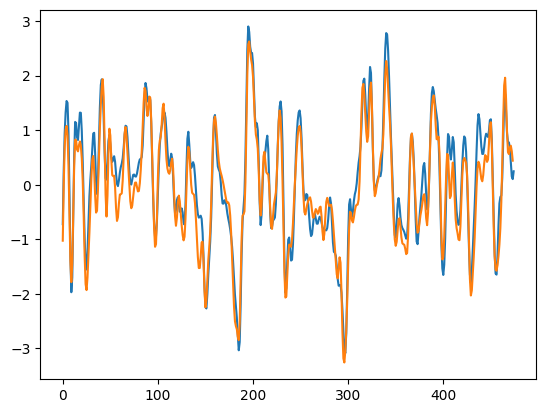

In [13]:
# Articulatory traces remain consistent after voice conversion.
plt.plot(src_code['ema'][:,5])
plt.plot(converted_code['ema'][:,5])

In [14]:
# source audio
src_wav,sr = sf.read(src_wav_file)
ipd.display(ipd.Audio(src_wav, rate=sr))

In [15]:
# target audio
trg_wav,sr = sf.read(trg_wav_file)
ipd.display(ipd.Audio(trg_wav, rate=sr))

# Unseen Language

In [16]:
wav_file = "../sample_audio/italian.wav"

In [17]:
code = coder.encode(wav_file)

In [18]:
wav = coder.decode(**code)

In [19]:
# resynthesized
ipd.display(ipd.Audio(wav, rate=coder.sr))

In [20]:
# ground truth reference
wavt,tsr = sf.read(wav_file)
ipd.display(ipd.Audio(wavt, rate=tsr))